In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\gas_turbine_fault_detection.csv")
df.head()

,Temperature (°C),RPM,Torque (Nm),Vibrations (mm/s),Power Output (MW),Fuel Flow Rate (kg/s),Air Pressure (kPa),Exhaust Gas Temperature (°C),Oil Temperature (°C),Fault
0,924.835708,15650.870645,3464.645167,1.675087,96.347590,2.265294,146.245460,517.611726,90.530958,0
1,893.086785,15780.755598,3190.276340,2.042084,83.288302,2.755950,166.812134,500.196460,136.047350,0
2,932.384427,15016.002075,3401.769251,2.006414,120.358735,2.574244,133.494161,516.272719,124.910039,0
3,976.151493,14623.291065,3443.024901,2.239914,104.689781,2.497101,140.141635,475.731083,123.298231,1
4,888.292331,15229.986071,3448.764050,1.865677,95.080431,2.763689,109.795667,546.737163,119.382239,1


<Axes: xlabel='RPM', ylabel='Fault'>

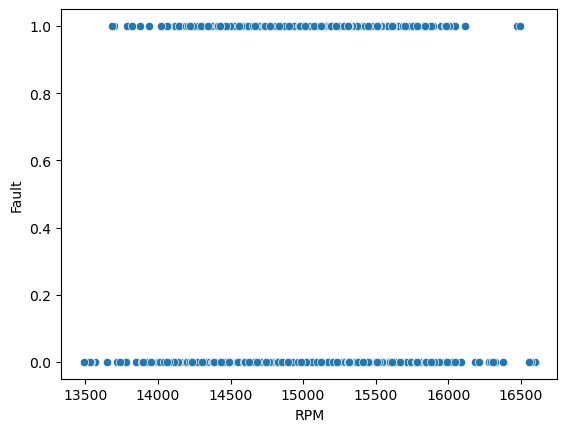

In [13]:
import seaborn as sns
sns.scatterplot(x='RPM', y='Fault', data=df)

<Axes: xlabel='Exhaust Gas Temperature (°C)', ylabel='Fault'>

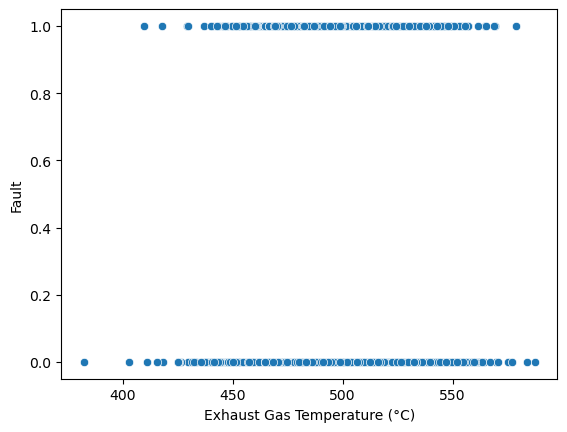

In [30]:
sns.scatterplot(x='Exhaust Gas Temperature (°C)', y='Fault', data=df)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

X = df.drop('Fault', axis=1)
y = df['Fault']
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

In [36]:
np.argmax(scores)

478

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
X = df.drop('Fault', axis=1)
y = df['Fault']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=487)
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.svm import SVC

In [ ]:

svc = SVC(kernel='poly', degree=5)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [33]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [35]:
clfs = {
    'SVC' : svc,
    'KN' : knc,  
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [39]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
    
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.6834532374100719
Precision -  0.0
For  KN
Accuracy -  0.5827338129496403
Precision -  0.22
For  LR
Accuracy -  0.6834532374100719
Precision -  0.0
For  RF
Accuracy -  0.6654676258992805
Precision -  0.38095238095238093


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.6474820143884892
Precision -  0.2727272727272727
For  BgC
Accuracy -  0.6618705035971223
Precision -  0.3333333333333333
For  ETC
Accuracy -  0.6762589928057554
Precision -  0.4166666666666667
For  GBDT
Accuracy -  0.6690647482014388
Precision -  0.3
For  xgb
Accuracy -  0.6187050359712231
Precision -  0.3125
